### Classify Breast Cancer Database based on SVM Algorithm (Support Vector Machine)
We try to Implement SVM on 
Data set is downloaded from :
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)
        

In [114]:
#This Part we import the necessary libraries

import numpy as np
import pandas as pd
import os

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler

In [3]:

os.getcwd()
#import the raw data into the data frame and create the name of columns based on the Attribute information from Dataset
df = pd.read_csv("Data/breast-cancer-wisconsin.data", names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin","Normal Nucleoli", "Mitoses", "Class"])
df.head()
print(df.shape)


(683, 11)


At this part we will drop the id and Class columns , we do not consider them as features.
The class columns will be our "lable" and the values need to be changed , value 2 to  0 which represents "benign" and value 4 to 1 which represents
"malignant"

<B>Note:</B> We need to Normalize data before processing it ,we will use this formula for normalization:   <B>normalized_df=(df-df.mean())/df.std()

In [5]:
# drop ID and Class columns
temp_raw_data = df.drop(['id','Class'], axis=1)

# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)

normalized_data = (temp_raw_data - np.mean(temp_raw_data)) / np.std(temp_raw_data)
normalized_data.head()

# map class variable to 1's (malignant) and 0's (benign)
normalized_data['Class'] = df['Class'].map({4:1, 2:0})
normalized_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484,0
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484,0
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484,0
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0


In [48]:
#At this section we devide the normalized data into Feature and labels 
features = normalized_data.drop('Class', axis=1)
labels = normalized_data['Class']
print(labels.head())
features.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [57]:
# split data into training and test features and labels using 60/40 train and test 
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=.6)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(409, 9) (409,)
(274, 9) (274,)


### Hyperparameter tuning can be particularly impactful for SVM

In [94]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
'gamma': [0.001, 0.01, 0.1, 0.5, 1, 10],
'kernel': ['linear', 'rbf', 'poly'],
'degree': [0, 1, 2, 3, 4, 5]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_train, y_train)
print(grid)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'degree': [0, 1, 2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})


In [87]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [95]:
# summarize the results of the grid search
print("best_score:%s" %grid.best_score_)
print("best_estimator:%s"%grid.best_estimator_)

best_score:0.970701595904848
best_estimator:SVC(C=0.001, degree=1, gamma=10, kernel='poly')


<B>Note:</B> Based on the grid search the best Kerner is "Poly" and the best value for C will be 0.001 and degree will be 1

In [103]:
penalty_parameter_C = [0.001, 0.01, 0.1, 1, 10, 50, 100]
poly_degrees = [1, 2, 3, 4, 5]

train_accuracy = []
test_accuracy = []

for d in poly_degrees:
    for c in penalty_parameter_C:
        svc = svm.SVC(C=c, degree=d, kernel='poly')
        svc.fit(X_train, y_train)
        train_accuracy.append((svc.score(X_train, y_train)))
       # test_accuracy.append((c,d,(svc.score(X_test, y_test))))
        test_accuracy.append((svc.score(X_test, y_test)))
        

In [78]:
#data_SVM = pd.DataFrame(test_accuracy,columns=["C","d","Test_Accuracy"])
#data_SVM

In [79]:
#Here we try to plot the Dataframe which is consist of "Test_Accuracy" data
#sns.relplot(data_SVM['C'],data_SVM['d'], hue =data_SVM["Test_Accuracy"])

At this part we make the HeatMap for Test Accuracies

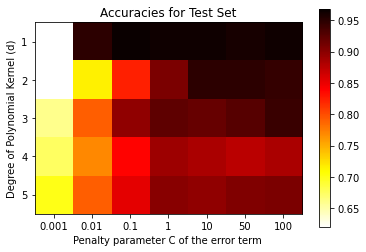

In [104]:
# load test accuracies into 2D numpy array
acc_img = np.array(test_accuracy).reshape(len(poly_degrees), len(penalty_parameter_C))


# plot heatmap of accuracies
plt.imshow(acc_img, cmap=plt.cm.hot_r)
plt.colorbar()

plt.title('Accuracies for Test Set')
plt.xticks(np.arange(len(penalty_parameter_C)), penalty_parameter_C)
plt.yticks(np.arange(len(poly_degrees)), poly_degrees)
plt.xlabel('Penalty parameter C of the error term ')
plt.ylabel('Degree of Polynomial Kernel (d)');

Based on above Heatmap figure the accuracy will decrease when degree of Polynomial kernel increased,also it seems when d is 1 we have better accuracy while increasing the C value and it can lead to overfitting. So based on the above figure the best C will be 0.001 and degree will be 1 and the gamma is 10. when we calculate the accuracy It will be around 96%

In [105]:
final_svc_poly = svm.SVC(C=.001, degree=1,gamma = 10, kernel='poly')
final_svc_poly.fit(X_train, y_train)
final_svc_poly.score(X_test, y_test)

0.9671532846715328

## Evaluation of the Model

In [112]:
prediction = final_svc_poly.predict(X_test)

print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.9671532846715328
F1 score: 0.9569377990430622
Recall: 0.9615384615384616
Precision: 0.9523809523809523

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       170
           1       0.95      0.96      0.96       104

    accuracy                           0.97       274
   macro avg       0.96      0.97      0.97       274
weighted avg       0.97      0.97      0.97       274


 confussion matrix:
 [[165   5]
 [  4 100]]
